In [71]:
# !pip install -r requirements # uncomment to install package requirements

In [68]:
# Import cagraph functionality
from cagraph import CaGraph
import visualization as viz
import preprocess as prep

# Additional useful imports and display setup
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 150)
import os

# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

In [69]:
# Select file to use as dataset to generate graph examples
FILENAME = '1055-3_D1_smoothed_calcium_traces.csv'


In [70]:
# Set hyperparameters
THRESHOLD = 0.3


In [57]:
# Generate graph object from numpy.ndarray
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')
print(f"This dataset contains {data.shape[0] - 1} neurons and {data.shape[1]} timepoints.")

# Visualize raw data using pandas.DataFrame
df = pd.DataFrame(data)
build_index = ['time']
for i in range(data.shape[0] - 1):
    build_index.append('neuron ' + str(i))
df.index = build_index
display(df)

This dataset contains 122 neurons and 3600 timepoints.


,0,1,2,3,4,...,3595,3596,3597,3598,3599
time,0.100000,0.200000,0.30000,0.400000,0.50000,...,3.596000e+02,3.597000e+02,3.598000e+02,3.599000e+02,3.600000e+02
neuron 0,0.285750,0.262420,0.24099,0.221320,0.20325,...,6.906700e-50,6.342800e-50,5.825000e-50,5.349400e-50,4.912600e-50
neuron 1,0.446380,0.404920,0.36731,0.333190,0.30225,...,4.665400e+00,4.232100e+00,3.839000e+00,3.482400e+00,3.158900e+00
neuron 2,4.724500,4.098900,3.55620,3.085300,2.67680,...,2.710500e-22,2.351600e-22,2.040200e-22,1.770100e-22,1.535700e-22
neuron 3,0.037735,0.033251,0.02930,0.025818,0.02275,...,3.705800e-04,3.265400e-04,2.877400e-04,2.535400e-04,2.234200e-04
...,...,...,...,...,...,...,...,...,...,...,...
neuron 117,0.000000,0.000000,0.00000,0.000000,0.00000,...,1.653200e-02,1.370900e-02,1.136800e-02,9.427300e-03,7.817600e-03
neuron 118,0.000000,0.000000,0.00000,0.000000,0.00000,...,6.452500e-07,5.611700e-07,4.880400e-07,4.244400e-07,3.691300e-07
neuron 119,0.232050,0.188370,0.15292,0.124130,0.10077,...,2.642700e-06,2.145300e-06,1.741500e-06,1.413700e-06,1.147600e-06
neuron 120,0.351260,0.325990,0.30254,0.280780,0.26058,...,3.047700e-111,2.828500e-111,2.625000e-111,2.436200e-111,2.261000e-111


In [58]:
# Generate graph object, called "cg" from CSV file
# Build CaGraph object
cg = CaGraph(DATA_PATH + FILENAME, dataset_id = '1055-1', threshold=THRESHOLD) 
cg_graph = cg.get_network_graph() # Construct a graph

In [59]:
# Dataset information using CaGraph object
print(f"The dataset contains {cg.num_neurons} neurons and has a time interval of {cg.dt} sec")
print(f"Subject is {cg.data_id}")

The dataset contains 122 neurons and has a time interval of 0.1 sec
Subject is 1055-1


In [60]:
# Generate graph object from NWB file (standardized format)



In [61]:
# Analyze graph topology
# Compute the clustering coefficient for all nodes
cg_cc = cg.get_clustering_coefficient()

# Compute the correlated pairs ratio for all nodes
cg_cr = cg.get_correlated_pair_ratio()

# Compute the hubs in the graph
cg_hubs = cg.get_hubs()


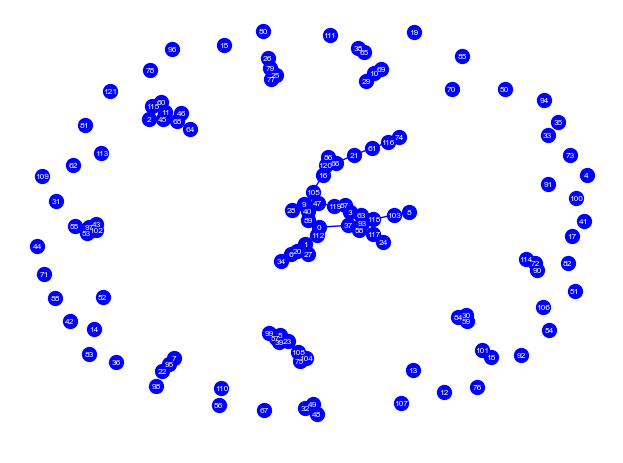

In [62]:
# Standard graph visualization with NetworkX
cg.plot_graph_network(graph=cg_graph) # Plot the graph (simplistic version)


In [63]:
# Interactive plotting with Bokeh integration - generate interactive graph
viz.interactive_network(ca_graph_obj=cg,
                        adjust_size_by='degree',
                        adjust_color_by='communities',
                        show_in_notebook=True)


Loading BokehJS ...

In [64]:
# Change threshold and visualize graph
cg.threshold = 0.4
viz.interactive_network(ca_graph_obj=cg,
                        adjust_size_by='degree',
                        adjust_color_by='communities',
                        show_in_notebook=True)


Loading BokehJS ...

/Users/veronica_porubsky/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/veronica_porubsky/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


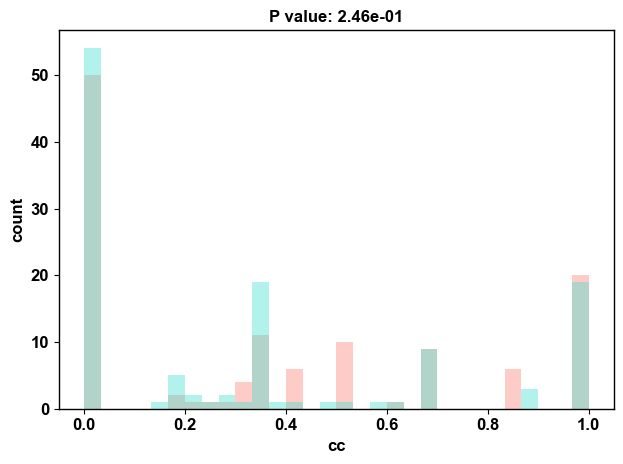

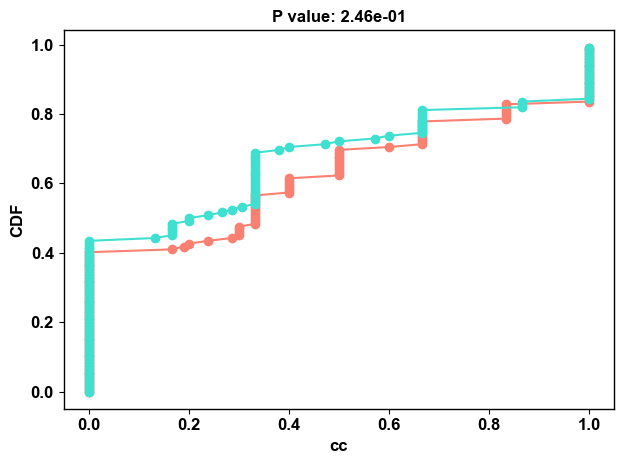

In [65]:
# Plotting CDF to compare two conditions
# Convert CSV to numpy.ndarry and index separate conditions
# Context A: second half of data
cg_A = CaGraph(np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')[:,1800:3600], threshold=THRESHOLD)
cg_A_cc = cg_A.get_clustering_coefficient()

# Context B: first half of data
cg_B = CaGraph(np.genfromtxt(DATA_PATH+ FILENAME, delimiter=',')[:,0:1800], threshold=THRESHOLD)
cg_B_cc = cg_B.get_clustering_coefficient()

# Plot histogram of distributions
viz.plot_histograms(data_list=[cg_A_cc, cg_B_cc],
                                x_label='cc',
                                color_list=['salmon','turquoise'],
                                bin_size=30,
                                show_plot=True)

# Plot cumulative distribution function
viz.plot_CDF_compare_two_samples(data_list=[cg_A_cc, cg_B_cc],
                                             x_label='cc',
                                             color_list=['salmon', 'turquoise'],
                                             show_plot=True)

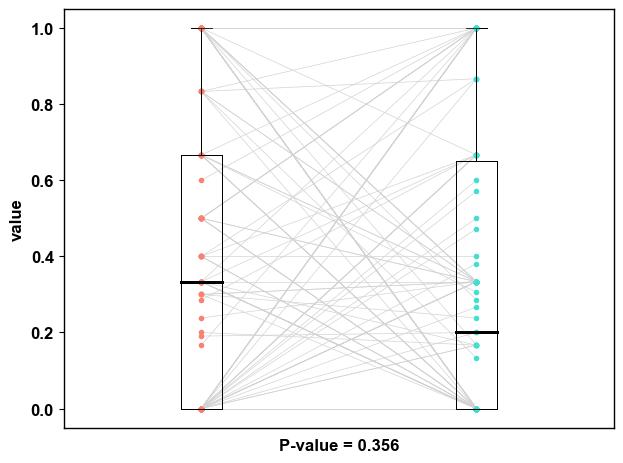

In [66]:
# Plotting matched samples
viz.plot_matched_data(sample_1=cg_A_cc,
                                  sample_2=cg_B_cc,
                                  labels=['A', 'B'],
                                  colors=['salmon','turquoise'],
                                  show_plot=True)

In [45]:
# Benchmarking with Preprocess class

# Generate shuffled dataset across individual neurons
data = np.genfromtxt(DATA_PATH + f'658-0_deconTrace.csv', delimiter=',')
event_data = np.genfromtxt(DATA_PATH + '658-0' + '_eventTrace.csv', delimiter=',')

# Shuffle the data using identified events
shuffled_data = prep.generate_event_shuffle(data=data.copy(), event_data=event_data)

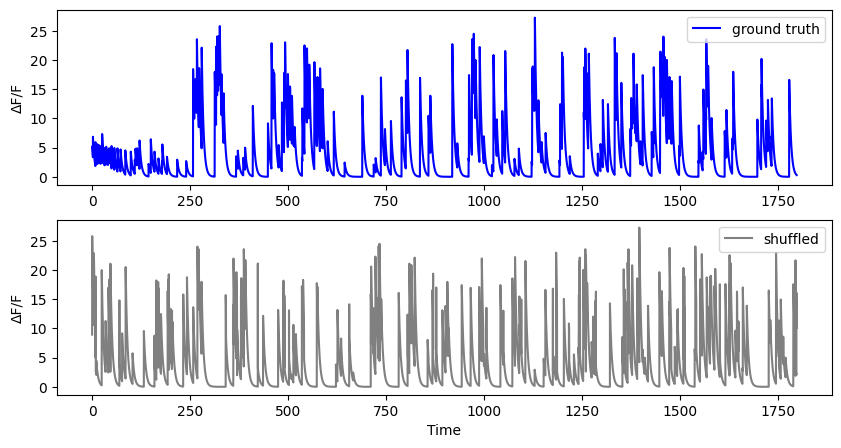

In [46]:
# Plot shuffled trace
prep.plot_shuffle_example(data=data.copy(), shuffled_data=shuffled_data, event_data=event_data)

KS-statistic: KstestResult(statistic=0.08349769888231427, pvalue=4.918511361942541e-05, statistic_location=0.0742334864253163, statistic_sign=1)
The threshold is: 0.162260400715953


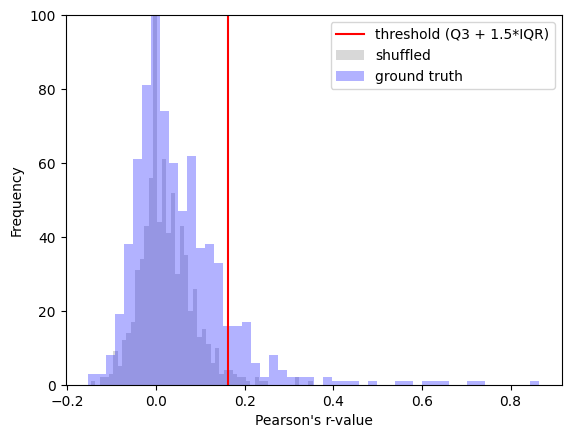

In [47]:
# Generate proposed threshold
threshold = prep.generate_threshold(data=data.copy(), shuffled_data=shuffled_data, event_data=event_data)

# Plot threshold
prep.plot_threshold(data=data.copy(), shuffled_data=shuffled_data, event_data=event_data)


In [48]:
# Batched analyses
# Todo: add batched analyses (looping through datasets, generating averaged or aggregated results)
# Todo: add generate_report() --> provides whole-graph topology analysis using minimal inputs (first-pass understanding)
# Todo: add identifier information, binary behavior-binning example